# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


# Display the data table for preview


In [3]:
combined_df = pd.merge(study_results,mouse_metadata, on="Mouse ID" , how ="inner")
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
print(f'number of unique mice IDs in the data: {len(combined_df["Mouse ID"].value_counts())}')

number of unique mice IDs in the data: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_df = combined_df.duplicated(subset="Mouse ID").sum()
duplicated_df

1644

In [6]:
combined_df.loc[combined_df.duplicated(),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [7]:
len(combined_df)

1893

In [8]:
len(combined_df.drop_duplicates(keep="first"))


1892

In [9]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_df =combined_df.loc[combined_df.duplicated(),:]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [10]:
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# Checking the number of mice in the clean DataFrame.
#combined_df["Mouse ID"].value_counts()

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_df["Mouse ID"].unique()

array(['g989'], dtype=object)

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [15]:
combined_df[["Drug Regimen","Tumor Volume (mm3)"]]

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,45.000000
1,Ketapril,45.000000
2,Ketapril,45.000000
3,Ketapril,45.000000
4,Ketapril,45.000000
...,...,...
1888,Capomulin,41.581521
1889,Capomulin,31.023923
1890,Ceftamin,61.433892
1891,Placebo,58.634971


In [16]:

mean_df= combined_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
mean_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [17]:
median_df= combined_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
median_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.854632
Ramicane,40.673236
Stelasyn,52.431737


In [18]:
variance_df= combined_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
variance_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.351070
Ramicane,23.486704
Stelasyn,59.450562


In [19]:
std_dev_df= combined_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
std_dev_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.507770
Ramicane,4.846308
Stelasyn,7.710419


In [20]:
std_err_df= combined_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
std_err_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [21]:
index1= std_err_df.index
index1

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [22]:
final_data = {
                "Mean Tumor Volume" :mean_df,
                "Median Tumor Volume" :median_df,
                "Tumor Volume Variance" : variance_df,
                "Tumor Volume Std. Dev.": std_dev_df,
                "Tumor Volume Std. Err." :std_err_df
                                                        }

final_df1 = pd.merge(mean_df,median_df, on="Drug Regimen", how ="inner")
final_df1.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume"})
final_df1


,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.322552,50.854632
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [23]:
final_df2 = pd.merge(final_df1,variance_df, on="Drug Regimen", how ="inner")

final_df2

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,40.675741,41.557809,24.947764
Ceftamin,52.591172,51.776157,39.290177
Infubinol,52.884795,51.820584,43.128684
Ketapril,55.235638,53.698743,68.553577
Naftisol,54.331565,52.509285,66.173479
Placebo,54.033581,52.288934,61.168083
Propriva,52.322552,50.854632,42.351070
Ramicane,40.216745,40.673236,23.486704
Stelasyn,54.233149,52.431737,59.450562


In [24]:
final_df2.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume","Tumor Volume (mm3)_y":"Median Tumor Volume",
                          "Tumor Volume (mm3)":"Tumor Volume Variance" }, inplace=True)
final_df3 = pd.merge(final_df2,std_dev_df, on="Drug Regimen", how ="inner")

final_df3

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume (mm3)
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [25]:
final_df4 = pd.merge(final_df3,std_err_df, on="Drug Regimen", how ="inner")
final_df4.rename(columns={"Tumor Volume (mm3)_x": "Tumor Volume Std. Dev." ,
                           "Tumor Volume (mm3)_y"   : "Tumor Volume Std. Err."          
                                                                             }, inplace=True)
final_df4

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [26]:
bar_data = combined_df [["Drug Regimen","Timepoint"]].groupby("Drug Regimen").count()
bar_data

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


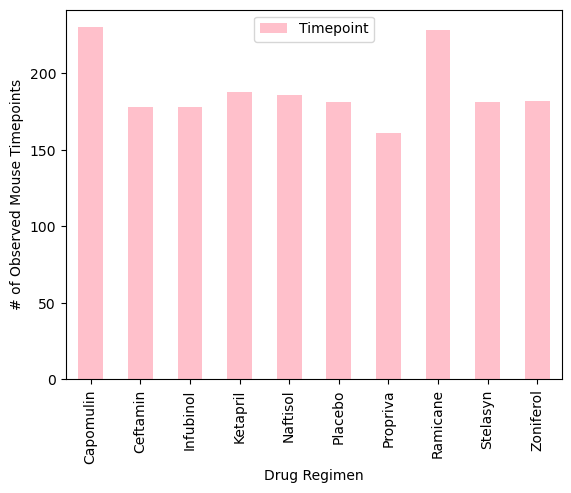

In [27]:
bar_data.plot(kind="bar" ,color= "pink")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [28]:
pie_chart=combined_df["Sex"].value_counts()
pie_chart

Sex
Male      958
Female    935
Name: count, dtype: int64

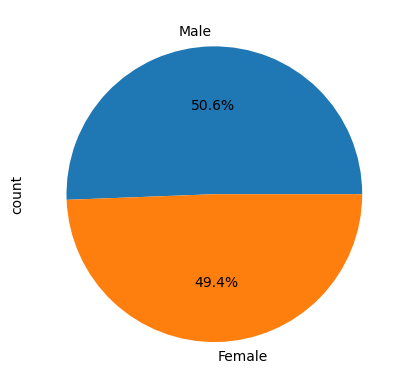

In [29]:
pie_chart.plot(kind="pie" , autopct='%1.1f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
capomulin_df = combined_df.loc[(combined_df["Drug Regimen"]=="Capomulin"),"Tumor Volume (mm3)"]
ramicane_df = combined_df.loc[(combined_df["Drug Regimen"]=="Ramicane"),"Tumor Volume (mm3)"]
infubinol_df = combined_df.loc[(combined_df["Drug Regimen"]=="Infubinol"),"Tumor Volume (mm3)"]
ceftamin_df = combined_df.loc[(combined_df["Drug Regimen"]=="Ceftamin"),"Tumor Volume (mm3)"]


170     45.000000
171     45.000000
172     45.000000
173     45.000000
174     45.000000
          ...    
1858    68.923185
1862    61.386660
1864    64.299830
1872    59.741901
1890    61.433892
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [63]:
quartile_data = {"Capomulin":capomulin_df,
                 "Ramicane" : ramicane_df,
                 "Infubinol" : infubinol_df,
                "Ceftamin" : ceftamin_df}
quartile_df = pd.DataFrame(quartile_data)
quartile_df.dropna(how="all")

,Capomulin,Ramicane,Infubinol,Ceftamin
0,45.000000,NaN,NaN,NaN
29,NaN,NaN,45.0,NaN
30,NaN,NaN,45.0,NaN
31,NaN,NaN,45.0,NaN
32,NaN,NaN,45.0,NaN
...,...,...,...,...
1879,NaN,32.978522,NaN,NaN
1885,NaN,33.562402,NaN,NaN
1888,41.581521,NaN,NaN,NaN
1889,31.023923,NaN,NaN,NaN


In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


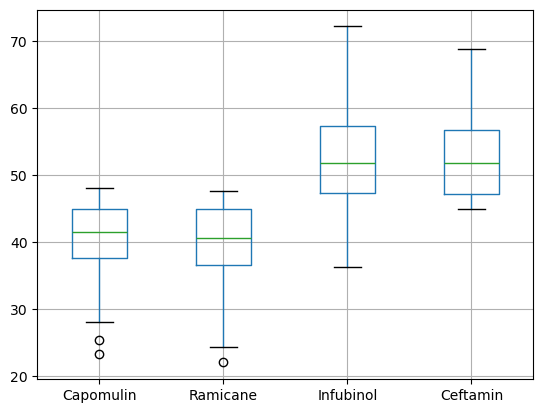

In [65]:
boxplot = quartile_df.boxplot(column=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

In [32]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [33]:
line_data =combined_df[["Tumor Volume (mm3)","Timepoint","Drug Regimen"]]
line_data = line_data.loc[line_data["Drug Regimen"]=="Capomulin"]
line_data = line_data.drop_duplicates(subset=["Timepoint"] )
line_data

,Tumor Volume (mm3),Timepoint,Drug Regimen
0,45.000000,0,Capomulin
253,45.851193,5,Capomulin
498,39.005494,10,Capomulin
714,38.177232,15,Capomulin
918,40.343948,20,Capomulin
1118,41.086991,25,Capomulin
1300,40.752216,30,Capomulin
1468,37.682767,35,Capomulin
1629,38.379726,40,Capomulin
1764,38.982878,45,Capomulin


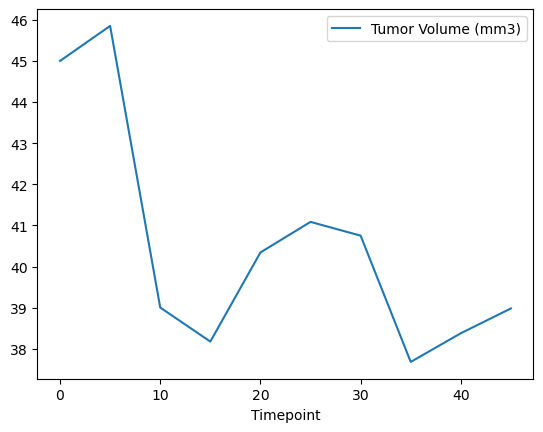

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_data.plot(x="Timepoint", y="Tumor Volume (mm3)")
plt.show()

In [35]:
scatter_data =combined_df[["Tumor Volume (mm3)","Weight (g)","Drug Regimen"]]
scatter_data = scatter_data.loc[scatter_data["Drug Regimen"]=="Capomulin"]
scatter_data = scatter_data[["Tumor Volume (mm3)","Weight (g)"]].groupby("Weight (g)").mean()
scatter_data = scatter_data.reset_index(level=0)
scatter_data



,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


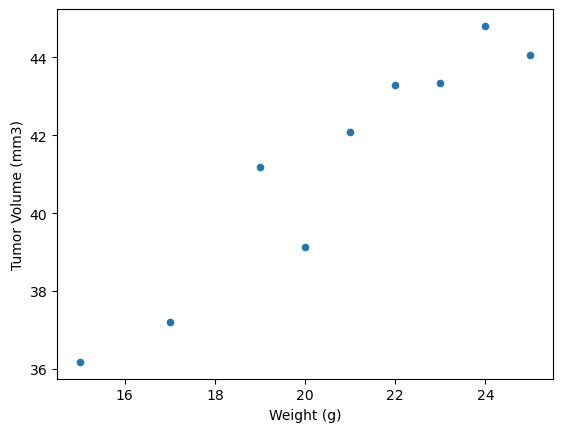

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_data.plot(kind="scatter", x="Weight (g)" ,y="Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [37]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [43]:
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(scatter_data["Weight (g)"],scatter_data[ "Tumor Volume (mm3)"])

In [45]:
pe_fit = pe_slope * scatter_data["Weight (g)"] + pe_int

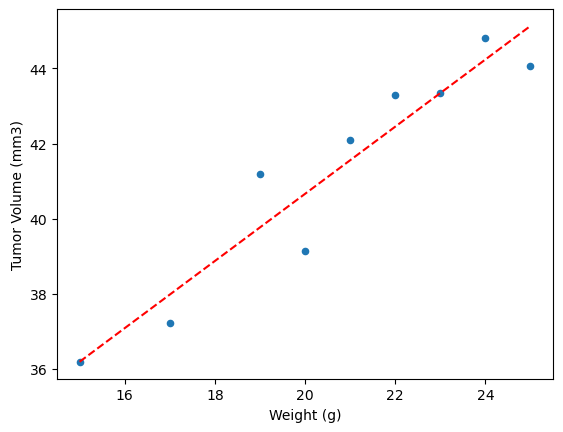

In [48]:
scatter_data.plot(kind="scatter", x="Weight (g)" ,y="Tumor Volume (mm3)")
plt.plot(scatter_data["Weight (g)"],pe_fit,"--", color="r")
plt.show()
